# INTRODUCTION

> Nama : Fajar Ibrah Muhammad

> Program ini dibuat untuk menganalisa/melakukan EDA dari dataset vgsales.csv.

Link Dashboard Tableau -> https://public.tableau.com/app/profile/fajar.muhammad6427/viz/Game8Dashboard/Game8Dashboard?publish=yes

# PROBLEM STATEMENTS

## CASE

Saya bekerja sebagai seorang Data Analyst di sebuah Game Studio bernama Game8 yang baru berdiri selama 1 tahun, dalam 1 tahun itu studio ini telah menyelesaikan dan men-deliver sebuah game, namun studio ini terlalu fokus kearah pembuatan game dan tidak memiliki strategi penjualan. Hal ini menyebabkan total penghasilan dan penjualan game tidak sesuai ekspektasi. Tugas saya sebagai seorang Data Analyst adalah memikirkan strategi agar penghasilan dan penjualan game selanjutnya dapat memenuhi ekspektasi, analisa strategi yang akan saya dilakukan akan berdasarkan dengan data yang dimiliki.

## SMART Framework

- Specific  : Melakukan perencanaan strategi penjualan sebelum pembuatan game, seperti perencanaan region yang akan di fokuskan, platform, genre game, dan publisher.

- Measurable : Meningkatkan penjualan game selanjutnya sebesar 25%.

- Achievable : Measurables dapat di capai dengan pemilihan pemfokusan region, platform dan genre game, dan kerja sama dengan publisher yang tepat.

- Relevant : Fokus pada peningkatan penjualan game yang paling sukses berdasarkan analisis data penjualan sebelumnya.

- Time Bound : Meningkatkan penjualan game selanjutnya, di waktu 4 bulan setelah delivery game selanjutnya.

## BREAKING DOWN THE PROBLEMS

Untuk mempermudah analisis dan juga pemecahan masalah, saya juga akan menggunakan Framework 5W+1H dalam analisis pemecahan masalah ini, 5W+1H ini akan digunakan sesuai dengan data penjualan game yang kita miliki.

1. <b> VISUALISASI </b>

- Di region mana kah penjualan game terbanyak terjadi?

- 10 publisher apa yang memiliki penjualan terbaik dari tahun 2010 sampai 2016?

- Berapa rata-rata penjualan di masing-masing region dari tahun 2010 sampai 2016?

- Apakah ada peningkatan penjualan game dari tahun 2010 sampai 2016?

- 10 Genre apa yang memiliki penjualan terbaik dari tahun 2010 sampai 2016?

- Bagaimana persentase penjulalan 6 platform terbaik?

2. <b> STATISTIKA DESKRIPTIF </b>

- Bagaimana pemusatan data penjualan game sejak tahun 2010 sampai 2016 jika dilihat dari penjualan global?

- Dari data yang kita miliki, Apa saja faktor yang memiliki korelasi dengan penjualan global?

3. <b> STATISTIKA INFERENSIAL </b>

- Apakah ada perbedaan penjualan unit antara 4 region yang datanya kita miliki?



# DATA LOADING

Data penjualan game ini didapat dari: https://www.kaggle.com/datasets/gregorut/videogamesales , data ini hanya memiliki data penjualan game minimal 100.000 copy. Angka sales disini dalam angka jutaan.

In [1]:
#import package yang diperlukan
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import vgsales.csv menjadi dataframe df_gsales
df_gsales = pd.read_csv('vgsales.csv')

In [3]:
df_gsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# DATA CLEANING

In [4]:
#menampilkan info dari g_sales
df_gsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Dari info diatas terlihat bahwa masih ada data yang bersifat Null di dalam dataframe ini, maka selanjutnya akan dilakukan pembersihan data.

In [5]:
#drop null value
df_gsales = df_gsales.dropna()

#menghapus kolom rank
del df_gsales['Rank']

#mengubah tipe data kolom Year menjadi integer
df_gsales['Year'] = df_gsales['Year'].astype(int)

C:\Users\R.O.G\AppData\Local\Temp\ipykernel_19024\1790554416.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gsales['Year'] = df_gsales['Year'].astype(int)


In [6]:
df_gsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


Terlihat dari informasi diatas bahwa sudah tidak ada null value di dalam dataframe kita, sudah terlihat juga bahwa tipe data kolom Year sudah berubah menjadi integer.

In [7]:
#menghilangkan data duplikat
df_gsales = df_gsales.drop_duplicates()

In [8]:
df_gsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


Terlihat dari info diatas bahwa tidak ada perubahan data, ini menunjukkan bahwa tidak ada data duplikat di dalam dataframe. 

In [9]:
#membuat dataframe baru yang hanya berisi data dari tahun 2010-2016, dan penjualan global diatas 0.1
df_gsales2 = df_gsales[(df_gsales['Year'] >= 2010) & (df_gsales['Year'] <= 2016) & (df_gsales['Global_Sales'] >= 0.1)]

Kita hanya memilih data dari 2010-2016 dikarenakan data dibawah tahun 2010 dianggap kurang relevan dengan kondisi trend yang sedang berlangsung, dan juga data dengan penjualan dibawah 0.1 atau dibawah 100,000 unit dianggap terlalu rendah untuk analisa ini. 

In [10]:
df_gsales2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3063 entries, 15 to 10814
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3063 non-null   object 
 1   Platform      3063 non-null   object 
 2   Year          3063 non-null   int32  
 3   Genre         3063 non-null   object 
 4   Publisher     3063 non-null   object 
 5   NA_Sales      3063 non-null   float64
 6   EU_Sales      3063 non-null   float64
 7   JP_Sales      3063 non-null   float64
 8   Other_Sales   3063 non-null   float64
 9   Global_Sales  3063 non-null   float64
dtypes: float64(5), int32(1), object(4)
memory usage: 251.3+ KB


Terlihat bahwa data yang kita miliki telah terpotong sesuai dengan kondisi yang diinginkan.

In [11]:
df_gsales2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...
10808,Natural Doctrine,PS4,2014,Role-Playing,Nippon Ichi Software,0.05,0.02,0.02,0.01,0.10
10810,Mystery Stories: Curse of the Ancient Spirits,DS,2011,Adventure,GSP,0.05,0.04,0.00,0.01,0.10
10811,Kuroko's Basketball: Miracle Game,3DS,2014,Sports,Namco Bandai Games,0.00,0.00,0.10,0.00,0.10
10813,MindJack,X360,2011,Shooter,Square Enix,0.07,0.02,0.00,0.01,0.10


In [12]:
#melihat data tahun yang unique
a = df_gsales2["Year"].unique()
a.sort()
print (a)

[2010 2011 2012 2013 2014 2015 2016]


Sudah terlihat bahwa hanya ada tahun antara 2010-2016, sesuai dengan yang diinginkan.

In [13]:
#mengkalikan semua sales dengan 1000000 untuk mempermudah visual pada saat analisa
df_gsales2['NA_Sales'] = df_gsales2['NA_Sales']*1000000
df_gsales2['EU_Sales'] = df_gsales2['EU_Sales']*1000000
df_gsales2['JP_Sales'] = df_gsales2['JP_Sales']*1000000
df_gsales2['Other_Sales'] = df_gsales2['Other_Sales']*1000000
df_gsales2['Global_Sales'] = df_gsales2['Global_Sales']*1000000

C:\Users\R.O.G\AppData\Local\Temp\ipykernel_19024\1547994803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gsales2['NA_Sales'] = df_gsales2['NA_Sales']*1000000
C:\Users\R.O.G\AppData\Local\Temp\ipykernel_19024\1547994803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gsales2['EU_Sales'] = df_gsales2['EU_Sales']*1000000
C:\Users\R.O.G\AppData\Local\Temp\ipykernel_19024\1547994803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [14]:
#eksport data yang sudah dibersihkan ke dalam vgsales-10.csv
df_gsales2 = df_gsales2.to_csv('vgsales-10.csv', index=False)

# ANALYSIS

In [15]:
#import vgsales-10.csv ke dalam dataframe baru
df_gsales3 = pd.read_csv('vgsales-10.csv')

df_gsales3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21400000.0
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5570000.0,3280000.0,5650000.0,820000.0,15320000.0
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0
...,...,...,...,...,...,...,...,...,...,...
3058,Natural Doctrine,PS4,2014,Role-Playing,Nippon Ichi Software,50000.0,20000.0,20000.0,10000.0,100000.0
3059,Mystery Stories: Curse of the Ancient Spirits,DS,2011,Adventure,GSP,50000.0,40000.0,0.0,10000.0,100000.0
3060,Kuroko's Basketball: Miracle Game,3DS,2014,Sports,Namco Bandai Games,0.0,0.0,100000.0,0.0,100000.0
3061,MindJack,X360,2011,Shooter,Square Enix,70000.0,20000.0,0.0,10000.0,100000.0


Selanjutnya kita akan melakukan analisa data dibantu oleh deskripsi masalah atau pertanyaan-pertanyaan yang telah kita uraikan menggunakan framework 5W+1H, analisa ini akan dilakukan dengan visualisasi dan statistika.

1. <b> VISUALISASI </b>

- Di region mana kah penjualan game terbanyak terjadi?

- 10 publisher apa yang memiliki penjualan terbaik dari tahun 2010 sampai 2016?

- Berapa rata-rata penjualan di masing-masing region dari tahun 2010 sampai 2016?

- Apakah ada peningkatan penjualan game dari tahun 2010 sampai 2016?

- 10 Genre apa yang memiliki penjualan terbaik dari tahun 2010 sampai 2016?

- Bagaimana persentase penjulalan 6 platform terbaik?

2. <b> STATISTIKA DESKRIPTIF </b>

- Bagaimana pemusatan data penjualan game sejak tahun 2010 sampai 2016 jika dilihat dari penjualan global?

- Dari data yang kita miliki, Apa saja faktor yang memiliki korelasi dengan penjualan global?

3. <b> STATISTIKA INFERENSIAL </b>

- Apakah ada perbedaan penjualan unit antara 4 region yang datanya kita miliki?

### VISUALISASI

#### Di region mana kah penjualan game terbanyak terjadi?

In [16]:
#mencari total sales dari semua region
NA_Salestot = sum(df_gsales3['NA_Sales'])
EU_Salestot = sum(df_gsales3['EU_Sales'])
JP_Salestot = sum(df_gsales3['JP_Sales'])
OT_Salestot = sum(df_gsales3['Other_Sales'])
GL_Salestot = sum(df_gsales3['Global_Sales'])

print(NA_Salestot)
print(EU_Salestot)
print(JP_Salestot)
print(OT_Salestot)
print(GL_Salestot)

1089890000.0
818060000.0
261320000.0
265030000.0
2434300000.0


In [17]:
#membuat dataframe berisi total sales semua region
data = {
    'Region': ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
    'Total Sales': [1089890000, 818060000, 261320000, 265030000, 2434300000]
}

df_salestot = pd.DataFrame(data)

df_salestot

,Region,Total Sales
0,NA_Sales,1089890000
1,EU_Sales,818060000
2,JP_Sales,261320000
3,Other_Sales,265030000
4,Global_Sales,2434300000


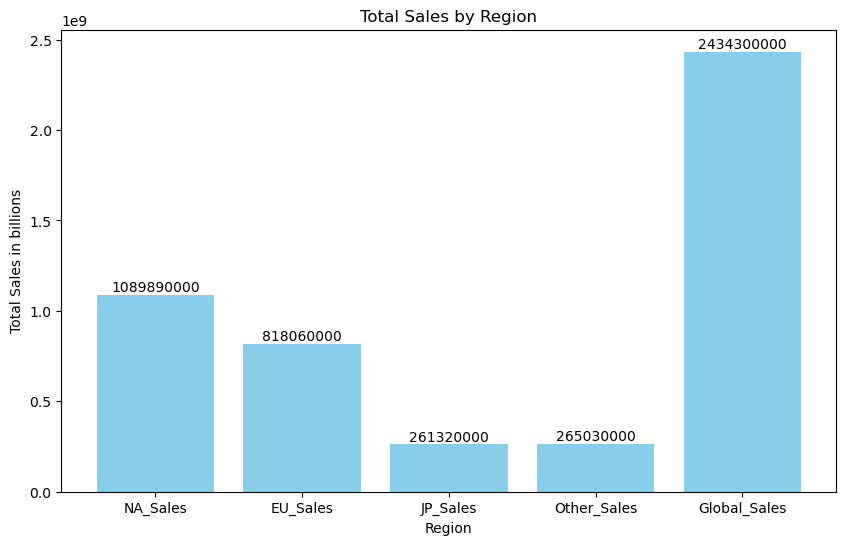

In [18]:
#membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_salestot['Region'], df_salestot['Total Sales'], color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales in billions')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


Data yang diberikan menunjukkan total penjualan untuk berbagai wilayah: North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), dan Other regions (Other_Sales).

Berikut adalah beberapa kesimpulan berdasarkan data tersebut:

> North America (NA_Sales):
NA_Sales memiliki total penjualan tertinggi di antara wilayah yang tercantum, dengan nilai sebesar 1.089.890.000.

> Europe (EU_Sales):
EU_Sales berada di peringkat kedua tertinggi di antara wilayah yang tercantum, dengan total penjualan sebesar 818.060.000.

> Japan (JP_Sales):
JP_Sales memiliki total penjualan sebesar 261.320.000, yang jauh lebih rendah dibandingkan dengan North America dan Europe.

> Other Regions (Other_Sales):
Penjualan di Other regions memiliki total sebesar 265.030.000, jumlah yang mirip dengan Japan.

Kesimpulan ini memberikan gambaran umum tentang komparasi penjualan di berbagai wilayah. dan selanjutnya kita dapat gunakan sebagai referensi pemilihan pemfokusan region untuk game ini.

#### 10 publisher apa yang memiliki penjualan terbaik dari tahun 2010 sampai 2016?

In [19]:
#menjumlahkan Global Sales berdasarkan publisher
df_publishersales = df_gsales3.groupby(['Publisher']).agg({'Global_Sales':'sum'})

df_publishersales.sort_values(by='Global_Sales', ascending=False, inplace=True)

df_publishersales = df_publishersales.head(10)

df_publishersales

,Global_Sales
Publisher,
Electronic Arts,359520000.0
Nintendo,300040000.0
Activision,291720000.0
Ubisoft,216690000.0
Take-Two Interactive,174550000.0
Microsoft Game Studios,123590000.0
Sony Computer Entertainment,122940000.0
Warner Bros. Interactive Entertainment,112800000.0
Namco Bandai Games,85450000.0


Text(0.5, 0, 'Global Sales in hundred millions')

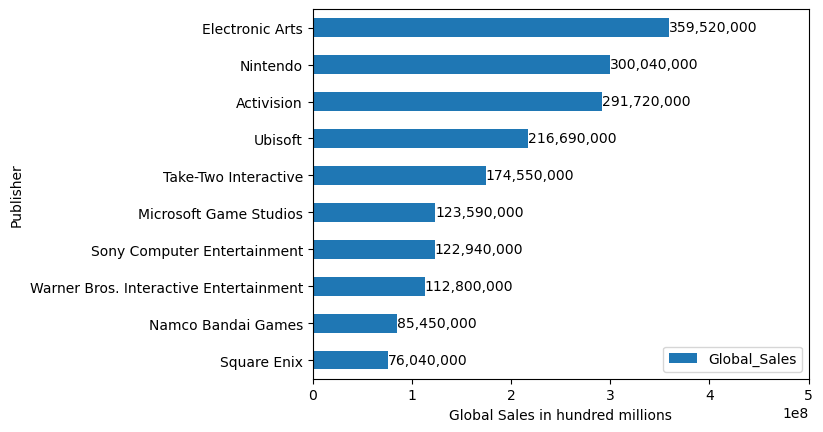

In [54]:
#membuat bar chart horizontal

df_publishersales = df_publishersales.sort_values(by='Global_Sales')

plot = df_publishersales.plot(kind='barh')

for index, value in enumerate(df_publishersales['Global_Sales']):
    plot.text(value, index, f'{int(value):,}', ha='left', va='center')

plt.xlim(0,500000000)
plt.xlabel('Global Sales in hundred millions')

Data yang diberikan menunjukkan total penjualan untuk 10 publisher game dengan total penjualan terbesar. Berikut adalah beberapa kesimpulan berdasarkan data tersebut:

> Electronic Arts:
Electronic Arts merupakan penerbit game teratas dalam hal penjualan total, dengan angka sebesar 359.520.000.

> Nintendo:
Nintendo mengikuti dengan penjualan total sebesar 300.040.000.

> Activision:
Activision menduduki posisi ketiga dengan penjualan total sebesar 291.720.000.

> Ubisoft:
Ubisoft berada pada posisi keempat dengan penjualan total sebesar 216.690.000.

> Take-Two Interactive:
Take-Two Interactive berada pada posisi kelima dengan penjualan total sebesar 174.550.000.

> Microsoft Game Studios:
Microsoft Game Studios menyusul dengan penjualan total sebesar 123.590.000.

> Sony Computer Entertainment:
Sony Computer Entertainment memiliki penjualan total sebesar 122.940.000.

> Warner Bros. Interactive Entertainment:
Warner Bros. Interactive Entertainment berada pada posisi kedelapan dengan penjualan total sebesar 112.800.000.

> Namco Bandai Games:
Namco Bandai Games menduduki posisi kesembilan dengan penjualan total sebesar 85.450.000.

> Square Enix:
Square Enix berada pada posisi kesepuluh dengan penjualan total sebesar 76.040.000.

Informasi ini nantinya juga dapat kita gunakan untuk pemilihan partner publisher game, jika nantinya ditemukan adanya korelasi antara publisher dan banyaknya penjualan unit.  

#### Berapa rata-rata penjualan di masing-masing region dari tahun 2010 sampai 2016?

In [21]:
#mencari rata-rata penjualan di setiap region
NA_Salesavg = df_gsales3['NA_Sales'].mean()
EU_Salesavg = df_gsales3['EU_Sales'].mean()
JP_Salesavg = df_gsales3['JP_Sales'].mean()
OT_Salesavg = df_gsales3['Other_Sales'].mean()
GL_Salesavg = df_gsales3['Global_Sales'].mean()

print(NA_Salesavg)
print(EU_Salesavg)
print(JP_Salesavg)
print(OT_Salesavg)
print(GL_Salesavg)

355824.3552073131
267078.02807704866
85315.05060398302
86526.28142344108
794743.7153117858


In [22]:
#membuat dataframe berisi rata2 penjualan tiap region
data = {
    'Region': ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
    'Average Sales': [355824, 267078, 85315, 86526, 794743]
}

df_salesavg = pd.DataFrame(data)

df_salesavg

,Region,Average Sales
0,NA_Sales,355824
1,EU_Sales,267078
2,JP_Sales,85315
3,Other_Sales,86526
4,Global_Sales,794743


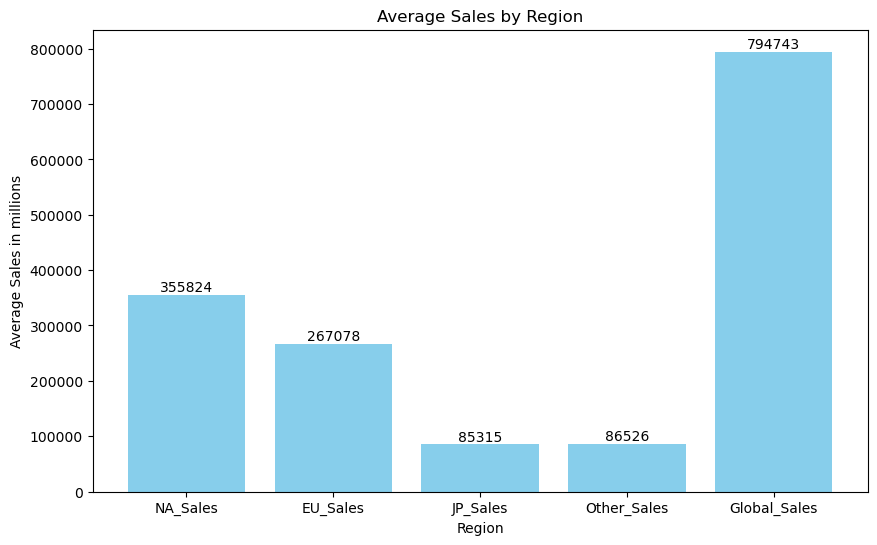

In [23]:
#membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_salesavg['Region'], df_salesavg['Average Sales'], color='skyblue')
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales in millions')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


Data tersebut menunjukkan rata-rata penjualan untuk berbagai wilayah:

> North America (NA_Sales): Rata-rata Penjualan = 355,824 unit

> Europe (EU_Sales): Rata-rata Penjualan = 267,078 unit

> Japan (JP_Sales): Rata-rata Penjualan = 85,315 unit

> Other Regions (Other_Sales): Rata-rata Penjualan = 86,526 unit

Data tersebut dapat kita jadikan referensi rata-rata jumlah penjualan yang bisa kita dapatkan di masing-masing region. 

#### Apakah ada peningkatan penjualan game dari tahun 2010 sampai 2016?

In [24]:
#group by total global sales berdasarkan tahun
df_yearsales = df_gsales3.groupby(['Year']).agg({'Global_Sales':'sum'})

df_yearsales.sort_values(by='Year', ascending=False, inplace=True)

df_yearsales

,Global_Sales
Year,
2016,63350000.0
2015,251960000.0
2014,328130000.0
2013,360310000.0
2012,353820000.0
2011,496850000.0
2010,579880000.0


Text(0, 0.5, 'Global Sales in hundred millions')

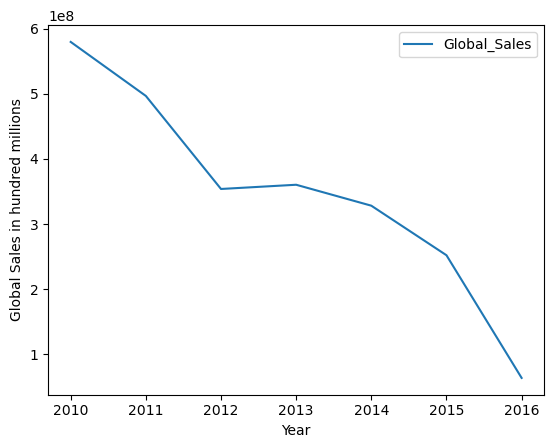

In [25]:
#membuat line chart
plot = df_yearsales.plot(kind='line')

plt.ylabel('Global Sales in hundred millions')

Data tersebut menunjukkan total penjualan game untuk setiap tahun:

> 2016: 63,350,000

> 2015: 251,960,000

> 2014: 328,130,000

> 2013: 360,310,000

> 2012: 353,820,000

> 2011: 496,850,000

> 2010: 579,880,000

Dari informasi yang kita temukan, terdapat kecenderungan penurunan penjualan yang cukup signifikan dalam total penjualan dari tahun 2010 hingga tahun 2016, kecuali di tahun 2013 dimana ada peningkatan penjualan dari tahun sebelumnya, namun peningkatan tidak terlalu signifikan.

Penjualan pada tahun 2016 mencapai 63.350.000, menunjukkan penurunan yang substansial dibandingkan dengan puncak penjualan pada tahun 2010.

Studio game dapat menggunakan data ini untuk merencanakan strategi pemasaran dan pengembangan game di masa depan. Memahami tren pasar dan mempersiapkan diri untuk perubahan dalam industri merupakan bagian penting dari perencanaan strategis.

#### 10 Genre apa yang memiliki penjualan terbaik dari tahun 2010 sampai 2016?

In [26]:
#group by total global sales berdasarkan genre
df_genresales = df_gsales3.groupby(['Genre']).agg({'Global_Sales':'sum'})

df_genresales.sort_values(by='Global_Sales', ascending=False, inplace=True)

df_genresales = df_genresales.head(10)

df_genresales

,Global_Sales
Genre,
Action,651800000.0
Shooter,458950000.0
Sports,316490000.0
Role-Playing,296540000.0
Misc,228580000.0
Racing,120020000.0
Platform,118490000.0
Fighting,78790000.0
Simulation,66530000.0


Text(0.5, 0, 'Global Sales in hundred millions')

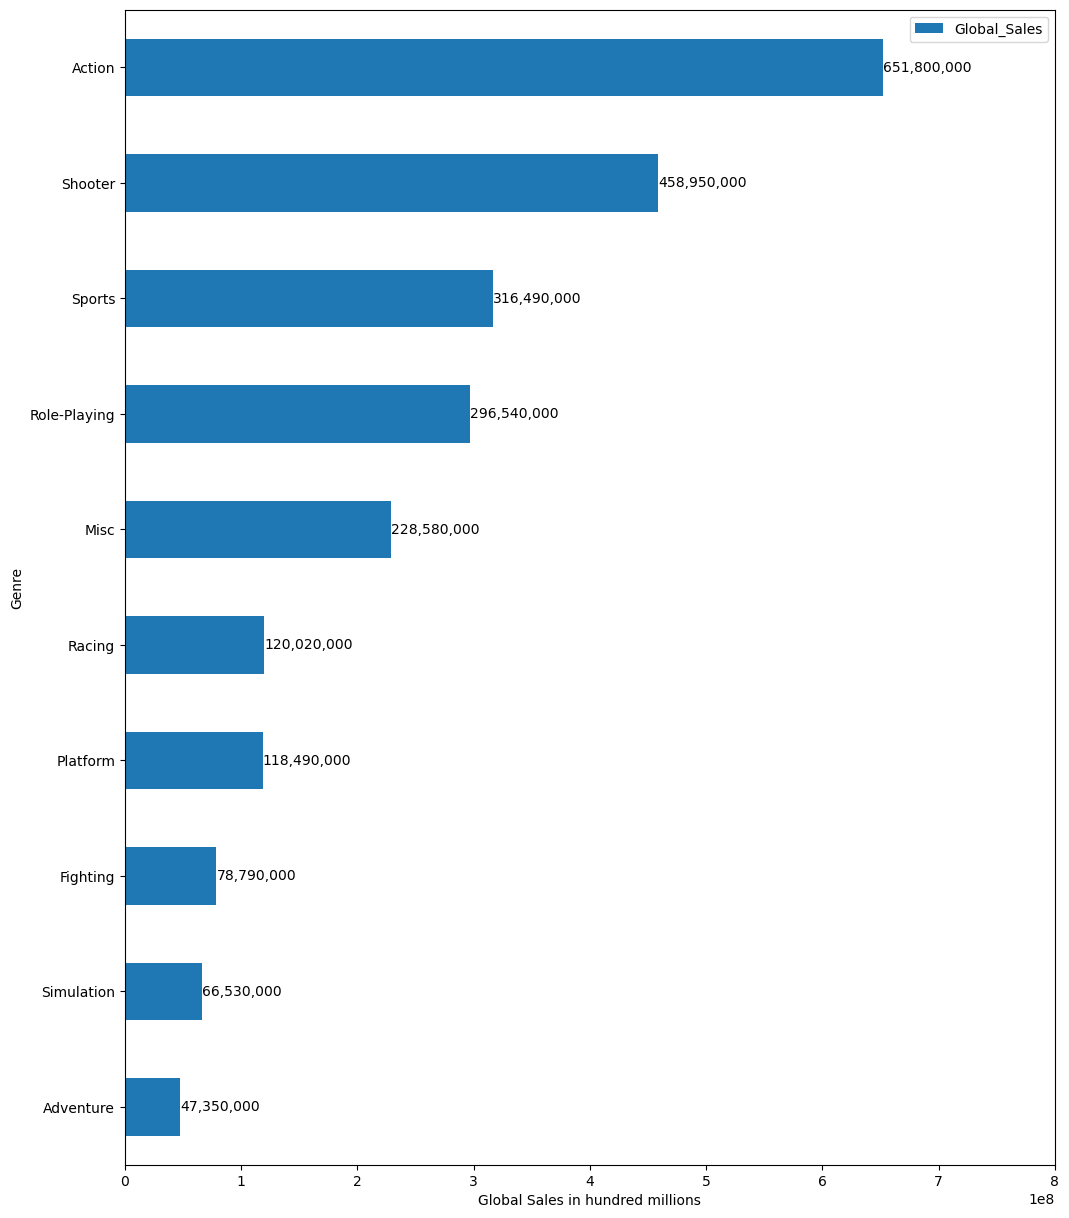

In [53]:
#membuat horizontal bar chart 
df_genresales = df_genresales.sort_values(by='Global_Sales')

plot = df_genresales.plot(kind='barh', figsize=(12,15))

for index, value in enumerate(df_genresales['Global_Sales']):
    plot.text(value, index, f'{int(value):,}', ha='left', va='center')

plt.xlim([0, 800000000])
plt.xlabel('Global Sales in hundred millions')

Berikut adalah beberapa kesimpulan berdasarkan data total penjualan global untuk 10 genre game dengan penjualan terbaik:


> Genre "Action" memiliki total penjualan global tertinggi, yaitu sebesar 651.800.000, menunjukkan popularitas tinggi di kalangan konsumen.

> Genre seperti "Shooter" dan "Sports" juga memiliki total penjualan global yang signifikan, masing-masing sebesar 458.950.000 dan 316.490.000.
Genre "Role-Playing" dan "Misc" juga memiliki penjualan total yang cukup tinggi, yaitu 296.540.000 dan 228.580.000.

>  Genre "Racing" dan "Platform" masih memiliki penjualan total diatas 100 juta unit, yaitu di angka 120.020.000 dan 118.490.000. Sedangkan 3 genre dengan penjualan terendah di 10 penjualan tertinggi adalah "Fighting", "Simulation", dan "Adventure", dengan penjualan total sebesar 78.790.000, 66.530.000, dan 47.350.000. 

Popularitas genre game tertentu mencerminkan tren konsumen dan preferensi pasar saat ini. Data ini dapat membantu dalam merencanakan pengembangan lebih lanjut atau fokus pada genre yang lebih populer untuk meningkatkan penjualan.

#### Bagaimana persentase penjulalan 6 platform terbaik?

In [28]:
#mencari 6 platform penjualan terbaik, sisanya dimasukkan kedalam kategori others 
df_platformsales = df_gsales3.groupby(['Platform'], as_index=False).agg({'Global_Sales':'sum'})

df_platformsales.sort_values(by='Global_Sales', ascending=False, inplace=True)

df_platformsales5 = df_platformsales[:6]

df_platformsalesOther = df_platformsales[6:]
df_othersum = df_platformsalesOther['Global_Sales'].sum()
df_others = {'Platform': 'Other', 'Global_Sales': df_othersum}

df_psales = pd.concat([df_platformsales5, pd.DataFrame([df_others])], ignore_index=True)
df_psales

,Platform,Global_Sales
0,PS3,592080000.0
1,X360,549680000.0
2,PS4,272700000.0
3,3DS,236420000.0
4,Wii,226060000.0
5,XOne,138840000.0
6,Other,418520000.0


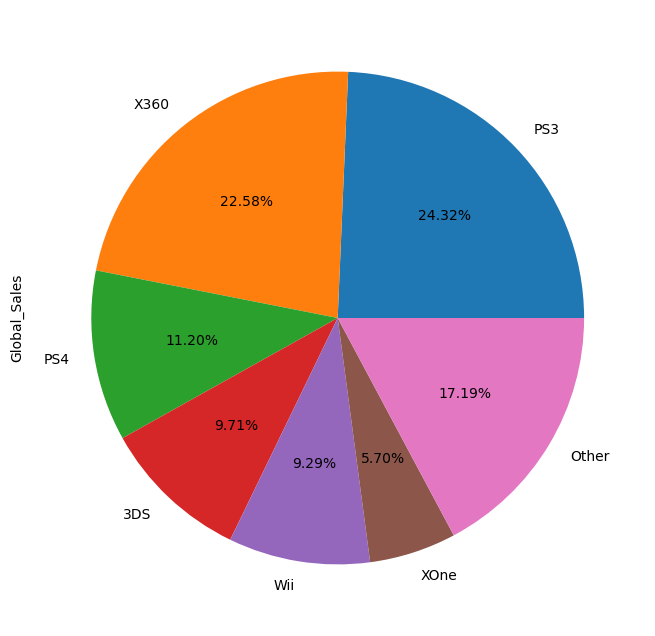

In [29]:
#membuat pie chart
fig,ax1 = plt.subplots(figsize=(8,8))
df_sales_chart = df_psales.set_index('Platform')
df_sales_chart['Global_Sales'].plot(kind='pie',  autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan data penjualan global untuk 5 platform game dengan penjualan total terbaik, berikut adalah beberapa kesimpulan:

> Penjualan Tinggi untuk Konsol Generasi Sebelumnya:
Baik PS3 maupun Xbox 360 (X360) mencapai penjualan global yang cukup besar, dengan PS3 sedikit unggul dengan 592.080.000, dan X360 mengikuti dengan 549.680.000. Ini menunjukkan minat konsumen untuk game di platform-platform ini masih ada.

> Kesuksesan untuk PS4 dan XOne:
PS4 telah mencapai penjualan global yang signifikan, mencapai 272.700.000. Meskipun penjualannya lebih rendah dibandingkan konsol generasi sebelumnya, ini menunjukkan adopsi yang sukses dari platform PS4 di pasar. Sementara platform generasi terbaru Xbox yaitu XOne telah mencapai angka penjualan 138.840.000.

> Gaming Portabel dengan 3DS:
Platform Nintendo 3DS mencapai penjualan global sebesar 236.420.000. Ini menunjukkan popularitas berkelanjutan dari konsol game portabel, terutama dengan fitur unik yang ditawarkan oleh 3DS.

> Kontribusi Wii:
Platform Wii mencapai penjualan sebesar 226.060.000. Meskipun mewakili angka yang sedikit lebih rendah dibandingkan platform lain dalam daftar, ini menandakan relevansi Wii di pasar game.

Menganalisis performa masing-masing platform memberikan wawasan tentang dinamika pasar dan preferensi konsumen. Memahami tren ini sangat penting untuk membuat keputusan tentang pengembangan game dan strategi pemasaran.

Selanjutnya kita pertimbangkan untuk memanfaatkan kesuksesan konsol generasi sebelumnya seperti PS3 dan X360, dan juga berinvestasi dalam pasar yang berkembang untuk platform baru seperti PS4.

### STATISTIKA DESKRIPTIF

#### Bagaimana pemusatan data penjualan game sejak tahun 2010 sampai 2016 jika dilihat dari penjualan global?

In [30]:
#menampilkan mean, median, dan modus dari global sales
print('Global sales average:',df_gsales3['Global_Sales'].mean())
print('Median of global sales:',df_gsales3['Global_Sales'].median())
print('Mode of global sales:',df_gsales3['Global_Sales'].mode().values[0])

Global sales average: 794743.7153117858
Median of global sales: 320000.0
Mode of global sales: 100000.0


> Rata-rata Penjualan Global: dapat terlihat bahwa rata-rata penjualan global adalah sebesar angka 794,743 unit.

> Median Penjualan Global: ketika semua penjualan global diurutkan, nilai tengah yang didapat adalah sebesar 320,000 unit.

> Modus Penjualan Global: Modus adalah value yang mewakili angka yang paling sering muncul, ini menunjukkan  bahwa 100,000 unit adalah tingkat penjualan yang umum atau banyak ditemukan di dalam data.

In [31]:
#menampilkan skewness dan kurtosis dari global sales
print(f"Skewness: {df_gsales3['Global_Sales'].skew()}")
print(f"Kurtosis: {df_gsales3['Global_Sales'].kurtosis()}")

Skewness: 6.044373138279105
Kurtosis: 50.51465872581155


Berdasarkan data yang kita dapatkan, dapat disimpulkan bahwa:

> Global Sales memiliki mean -> 794743, median -> 320000, saat value mean cukup jauh dari value median disini kita sudah dapat menyimpulkan bahwa terdapat outlier di dalam Global Sales. Value Skewness berada diatas angka 1 yaitu 6.04, yang berarti distribusi data ini tidak normal dan merupakan positive skew. Value dari kurtosis juga jauh diatas angka 0 yaitu 50.51, ini mengindikasikan bahwa ini merupakan leprokurtic kurtosis dan potensi hadirnya outlier di dalam data cukup besar.

> Terdapatnya outlier di dalam data tidak serta-merta mengharuskan kita untuk membuang data-data outlier-nya. Seperti kasus di analisa ini, dikarenakan data ini adalah positive skewness maka dapat diasumsikan bahwa cukup banyak value penjualan dibawah rata-rata, tapi dalam analisa dan observasi yang kita lakukan ini kita memerlukan data-data outlier tersebut. 

#### Dari data yang kita miliki, Apa saja faktor yang memiliki korelasi dengan penjualan global?

##### Apakah ada korelasi antara platform dengan penjualan global?

In [32]:
#spearman test
corr_rho, pval_s = stats.spearmanr(df_gsales3['Platform'], df_gsales3['Global_Sales'])

print(f"rho-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s}")

rho-correlation: 0.10
p-value: 1.2187590005000063e-08


Analisa ini mencari apakah ada korelasi Platform dan Global Sales dengan metode spearman. Hipotesa dalam analisa ini adalah :

> H0 : Platform dan Global Sales tidak memiliki keterkaitan

> H1 : Platform dan Global Sales memiliki keterkaitan

Diakarenakan p-value yang didapatkan jauh lebih kecil dari critical value (0.05), maka dapat disimpulkan bahwa H0 ditolak dan terdapat korelasi antara Platform dan Global Sales, walaupun hubungan tidak terlalu kuat dikarenakan value correlation yang cukup rendah.

##### Apakah ada korelasi antara genre dengan penjualan global?

In [33]:
#spearman test
corr_rho, pval_s = stats.spearmanr(df_gsales3['Genre'], df_gsales3['Global_Sales'])

print(f"rho-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s}")

rho-correlation: 0.06
p-value: 0.0005218086201499191


Analisa ini mencari apakah ada korelasi Genre dan Global Sales dengan metode spearman. Hipotesa dalam analisa ini adalah :

> H0 : Genre dan Global Sales tidak memiliki keterkaitan

> H1 : Genre dan Global Sales memiliki keterkaitan

Diakarenakan p-value yang didapatkan jauh lebih kecil dari critical value (0.05), maka dapat disimpulkan bahwa H0 ditolak dan terdapat korelasi antara Genre dan Global Sales, walaupun hubungan tidak terlalu kuat dikarenakan value correlation yang cukup rendah.

##### Apakah ada korelasi antara publisher dengan penjualan global?

In [34]:
#spearman test
corr_rho, pval_s = stats.spearmanr(df_gsales3['Publisher'], df_gsales3['Global_Sales'])

print(f"rho-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s}")

rho-correlation: 0.03
p-value: 0.13699158125428118


Analisa ini mencari apakah ada korelasi Publisher dan Global Sales dengan metode spearman. Hipotesa dalam analisa ini adalah :

> H0 : Publisher dan Global Sales tidak memiliki keterkaitan

> H1 : Publisher dan Global Sales memiliki keterkaitan

Dikarenakan p-value yang didapatkan lebih besar dari critical value (0.05), maka dapat disimpulkan bahwa H0 diterima dan tidak ada bukti bahwa adanya korelasi antara Publisher dan Global Sales.

### STATISTIKA INFERENSIAL

#### Apakah ada perbedaan penjualan unit antara 4 region yang datanya kita miliki?

In [35]:
df_gsales3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
1,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21400000.0
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5570000.0,3280000.0,5650000.0,820000.0,15320000.0
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0
...,...,...,...,...,...,...,...,...,...,...
3058,Natural Doctrine,PS4,2014,Role-Playing,Nippon Ichi Software,50000.0,20000.0,20000.0,10000.0,100000.0
3059,Mystery Stories: Curse of the Ancient Spirits,DS,2011,Adventure,GSP,50000.0,40000.0,0.0,10000.0,100000.0
3060,Kuroko's Basketball: Miracle Game,3DS,2014,Sports,Namco Bandai Games,0.0,0.0,100000.0,0.0,100000.0
3061,MindJack,X360,2011,Shooter,Square Enix,70000.0,20000.0,0.0,10000.0,100000.0


#### ANOVA TESTING

In [36]:
#melakukan anova test
res = stats.f_oneway(df_gsales3['NA_Sales'], df_gsales3['EU_Sales'], df_gsales3['JP_Sales'], df_gsales3['Other_Sales'])

print('P-value:',res.pvalue)

P-value: 2.2326546886611084e-135


Analisa ini mencari apakah ada perbedaan yang signifikan antara 4 region yang datanya kita miliki yaitu North America, European Union, Japan, dan Others. Hipotesa dalam analisa ini adalah :

> H0: Tidak ada perbedaan yang signifikan antara 4 region yang ada.

> H1: Terdapat perbedaan yang signifikan antara 4 region yang ada. 

Dikarenakan p-value yang didapatkan jauh lebih kecil dari critical value (0.05), maka dapat disimpulkan bahwa H0 ditolak dan terdapat perbedaan antara 4 region yang ada, yaitu North America, European Union, Japan, dan Others.

# CONCLUSION

Dari semua analisa visualisasi dan statistik yang telah dilakukan, saya sebagai seorang data analyst di Studio Game Game8, dapat menyimpulkan beberapa poin yang dapat menjadi strategi penjualan untuk game selanjutnya. Poin-poin yang saya dapatkan adalah:

> Fokus pada pengembangan game dengan genre "Action" dapat menjadi pilihan strategis, mengingat genre ini memiliki total penjualan global tertinggi. Selain itu, pertimbangkan pula genre-game populer lainnya seperti "Shooter", "Sports", dan "Role-Playing".

> Dikarenakan dominasi region North America dalam total penjualan game cukup signifikan dan pada Anova Testing terlihat bahwa ada perbedaan signifikan antara masing-masing region, maka kita dapat fokuskan penjualan game selanjutnya kesana terlebih dahulu. Ini sangat membantu dikarenakan game yang akan dibuat akan berbahasa inggris, Ini sangat membantu mengurangi biaya dan waktu pembuatan game karena tidak memerlukan lokalisasi dan translasi.

> Kita juga perlu mempertimbangkan masuk ke pasar global, untuk mencapai pasar yang lebih luas. Namun untuk hal ini akan diperlukan biaya dan waktu yang signifikan.

> Pada testing kita temukan bahwa tidak ada hubungan antara publisher dengan sales, dari sini dapat diambil beberapa jalur strategi, kita dapat bekerjasama dengan publisher dengan rekam jejak terbaik, bekerjasama dengan publisher yang kita sukai, atau bekerjasama dengan publisher yang menawarkan kontrak paling menguntungkan.

> Pembuatan Game dapat difokuskan terhadap platform dengan persentase penjualan terbaik di pasar game, Kita dapatkan bahwa PS3 dan X360 memiliki persentase yang mirip, ini adalah target utama platform untuk game selanjutnya. Namun, harus juga fokus terhadap PS4 dan XOne sebagai platform generasi baru yang telah mencapai penjualan yang cukup signifikan. 

Konklusi yang didapatkan adalah dengan menggabungkan pendekatan yang sesuai dengan poin-poin diatas, Studio Game Game8 dapat memaksimalkan peluang peningkatan penjualan sebesar 25% untuk game selanjutnya. Tapi penting untuk diingat untuk tetap fleksibel dan siap untuk menyesuaikan strategi berdasarkan respons pasar dan tren yang ada.